In [6]:
import pandas as pd
import numpy as np

### Load metadata

In [2]:
samples_df = pd.read_csv("../../config/sample_metadata.tsv", sep="\t")
comparisons_df = pd.read_csv("../../config/comparison_metadata.tsv", sep="\t")

In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")

In [24]:
lats = []
longs = []
for country in comparisons_df['country']:
    loc = geolocator.geocode(country)
    lats.append(loc.latitude)
    longs.append(loc.longitude)

comparisons_df.loc[:, 'latitude'] = lats
comparisons_df.loc[:, 'longitude'] = longs

In [29]:
comparisons_df.to_csv("../../config/comparison_metadata.tsv", sep="\t", index=False)

### Map the samples

In [44]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
import cartopy.crs as ccrs
import cartopy.feature as cfeature

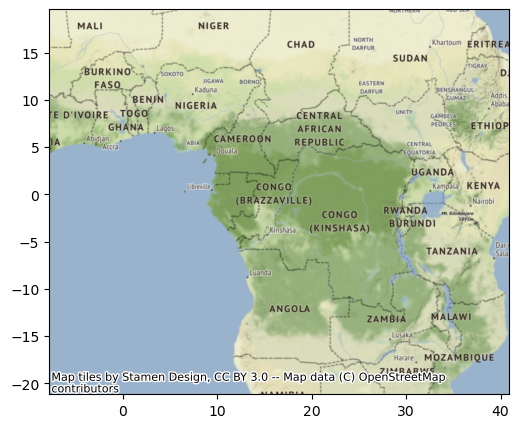

In [40]:
# Sample positions
freqMap = gpd.GeoDataFrame(
    comparisons_df, geometry=gpd.points_from_xy(comparisons_df.longitude, comparisons_df.latitude, crs="EPSG:4326"))

ax = freqMap.plot(figsize=(6, 5), alpha=0)
cx.add_basemap(ax, crs="EPSG:4326")

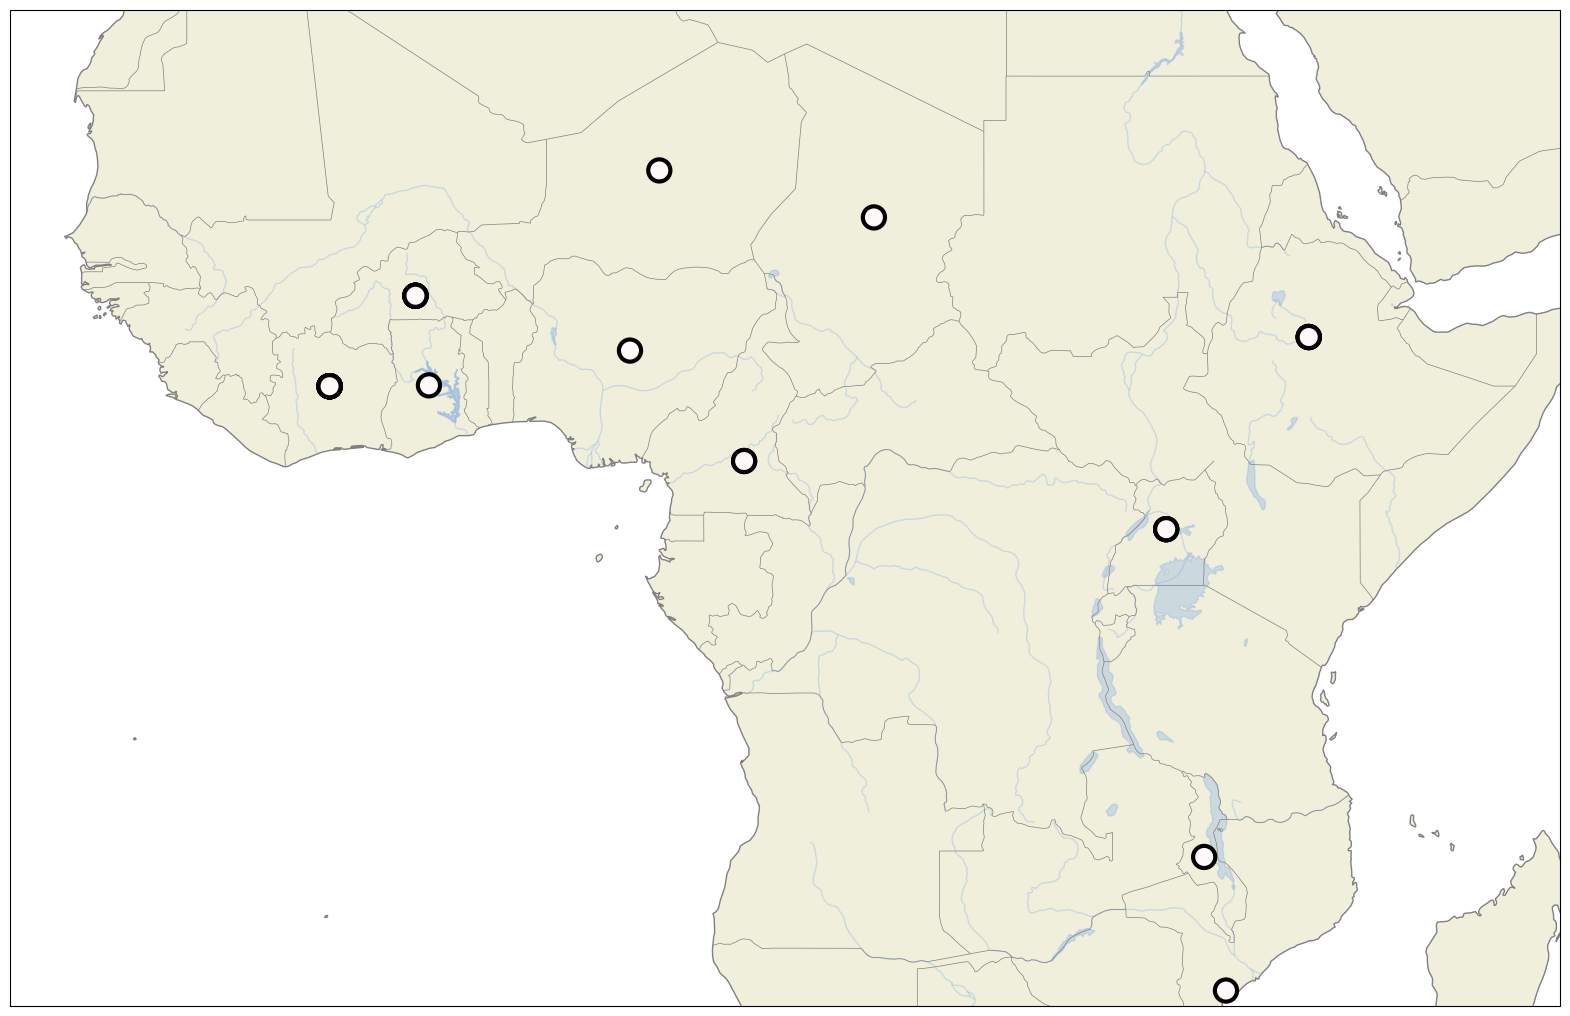

In [61]:
subplot_kw = dict(projection=ccrs.PlateCarree())
# figsize here is the entire figure size in inches, reduced later by bbox_inches
# This dpi setting affects the display size of the figure in the notebook
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)
ax.add_feature(cfeature.LAND, linewidth=1, zorder=1, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, zorder=2, edgecolor='gray')
ax.add_feature(cfeature.LAKES, alpha=0.4)
ax.add_feature(cfeature.RIVERS, alpha=0.4)

for i, row in comparisons_df.iterrows():
    lat, long = row[['longitude', 'latitude']]
    
    ax.add_patch(plt.Circle(xy=(lat, long), radius=0.5, facecolor='snow', edgecolor='k', zorder=8, lw=3))

ax.set_extent([-20, 50, -20, 25], crs=ccrs.PlateCarree())